In [0]:
import pandas as pd

import requests
import json
import os
import datetime
import time
import seaborn as sn


import pyspark.sql.functions as F

In [0]:
%run ./keys

## Generating dataframe for 16 days ahead

In [0]:
api_key = ow_key

lat = "39.149041"
lon = "-86.5269164"

# Coordinates for Bloomington
# 39.14904119776595, -86.52691640298076

url = "https://api.openweathermap.org/data/2.5/forecast/daily?lat=%s&lon=%s&appid=%s&units=imperial&cnt=16" % (lat, lon, api_key)


In [0]:
# 200 is a good sign, #400 is a bad sign
response = requests.get(url)
response

Out[161]: <Response [200]>

In [0]:
data = json.loads(response.text)

In [0]:
# Snippet of JSON file.
json_formatted_str = json.dumps(data, indent=3)
print(json_formatted_str)

{
   "city": {
      "id": 4254679,
      "name": "Bloomington",
      "coord": {
         "lon": -86.5269,
         "lat": 39.149
      },
      "country": "US",
      "population": 80405,
      "timezone": -14400
   },
   "cod": "200",
   "message": 5.4917529,
   "cnt": 16,
   "list": [
      {
         "dt": 1685984400,
         "sunrise": 1685960448,
         "sunset": 1686013720,
         "temp": {
            "day": 77.47,
            "min": 56.12,
            "max": 77.65,
            "night": 65.55,
            "eve": 74.05,
            "morn": 56.12
         },
         "feels_like": {
            "day": 76.89,
            "night": 63.91,
            "eve": 72.75,
            "morn": 55.15
         },
         "pressure": 1015,
         "humidity": 42,
         "weather": [
            {
               "id": 803,
               "main": "Clouds",
               "description": "broken clouds",
               "icon": "04d"
            }
         ],
         "speed": 8.34,
       

In [0]:
rdd = spark.sparkContext.parallelize([response.text])
df = spark.read.json(rdd)
display(df)

city,cnt,cod,list,message
"List(List(39.149, -86.5269), US, 4254679, Bloomington, 80405, -14400)",16,200,"List(List(80, 28, 1685984400, List(76.89, 72.75, 55.15, 63.91), 23.13, 42, 0.0, 1015, null, 8.34, 1685960448, 1686013720, List(77.47, 74.05, 77.65, 56.12, 56.12, 65.55), List(List(broken clouds, 04d, 803, Clouds))), List(84, 336, 1686070800, List(77.49, 75.15, 53.06, 66.76), 13.69, 44, 0.05, 1014, null, 8.97, 1686046832, 1686100156, List(77.92, 75.11, 80.46, 54.25, 54.82, 66.94), List(List(broken clouds, 04d, 803, Clouds))), List(100, 58, 1686157200, List(62.89, 70.14, 58.6, 56.88), 17.34, 90, 0.98, 1012, 16.43, 7.18, 1686133218, 1686186592, List(62.69, 70.61, 73.42, 58.08, 58.41, 58.08), List(List(heavy intensity rain, 10d, 502, Rain))), List(4, 86, 1686243600, List(72.14, 65.68, 49.84, 58.96), 8.5, 39, 0.04, 1012, null, 5.14, 1686219605, 1686273026, List(73.27, 66.47, 74.14, 51.49, 51.64, 60.44), List(List(sky is clear, 01d, 800, Clear))), List(7, 313, 1686330000, List(71.42, 66.09, 52.11, 55.17), 7.16, 31, 0.0, 1013, null, 5.61, 1686305994, 1686359459, List(72.97, 66.79, 74.08, 50.11, 54.12, 56.73), List(List(sky is clear, 01d, 800, Clear))), List(84, 209, 1686416400, List(77.18, 72.09, 56.5, 66.4), 7.96, 38, 0.11, 1010, null, 6.2, 1686392386, 1686445890, List(77.9, 71.94, 80.31, 53.06, 57.78, 66.61), List(List(broken clouds, 04d, 803, Clouds))), List(100, 230, 1686502800, List(75.02, 73.74, 63.73, 66.4), 21.68, 79, 1.0, 1006, 23.66, 10.65, 1686478779, 1686532320, List(74.19, 72.52, 74.19, 62.2, 63.03, 65.5), List(List(moderate rain, 10d, 501, Rain))), List(97, 314, 1686589200, List(71.67, 67.23, 61.03, 59.14), 17.38, 68, 1.0, 1011, 3.51, 11.12, 1686565174, 1686618748, List(71.62, 66.88, 73.44, 59.04, 60.71, 59.04), List(List(light rain, 10d, 500, Rain))), List(1, 302, 1686675600, List(76.28, 71.76, 58.19, 61.63), 11.01, 49, 0.0, 1013, null, 7.2, 1686651570, 1686705175, List(76.62, 71.56, 77.22, 54.19, 58.24, 62.06), List(List(sky is clear, 01d, 800, Clear))), List(67, 178, 1686762000, List(79.3, 75.47, 61.83, 69.1), 28.88, 56, 1.0, 1009, 14.01, 12.86, 1686737969, 1686791600, List(79.3, 74.34, 83.7, 57.7, 62.15, 68.13), List(List(heavy intensity rain, 10d, 502, Rain))), List(100, 228, 1686848400, List(83.48, 77.4, 69.44, 70.86), 34.4, 72, 1.0, 1003, 39.45, 17.27, 1686824369, 1686878024, List(80.17, 76.26, 82.31, 64.4, 68.34, 70.02), List(List(heavy intensity rain, 10d, 502, Rain))), List(63, 217, 1686934800, List(89.44, 89.83, 69.71, 68.95), 23.13, 50, 1.0, 1008, 8.17, 11.23, 1686910771, 1686964446, List(87.01, 83.28, 89.35, 64.99, 68.81, 67.86), List(List(moderate rain, 10d, 501, Rain))), List(5, 295, 1687021200, List(73.99, 67.53, 56.82, 57.11), 21.9, 49, 1.0, 1014, 0.93, 12.37, 1686997175, 1687050866, List(74.53, 67.89, 75.25, 56.97, 56.97, 57.65), List(List(light rain, 10d, 500, Rain))), List(0, 172, 1687107600, List(77.34, 72.09, 58.1, 62.91), 13.4, 44, 0.0, 1020, null, 6.13, 1687083581, 1687137285, List(77.79, 71.87, 79.41, 52.72, 58.86, 63.09), List(List(sky is clear, 01d, 800, Clear))), List(100, 189, 1687194000, List(65.93, 74.95, 62.15, 67.84), 29.21, 86, 0.47, 1013, 0.3, 11.83, 1687169988, 1687223702, List(65.62, 73.9, 73.9, 58.21, 62.62, 66.85), List(List(light rain, 10d, 500, Rain))), List(67, 357, 1687280400, List(88.36, 73.74, 69.19, 63.61), 21.47, 60, 0.55, 1014, 0.48, 12.26, 1687256398, 1687310117, List(84.49, 73.49, 84.49, 63.86, 68.16, 63.86), List(List(light rain, 10d, 500, Rain))))",5.4917529


In [0]:
# Create a dataframe as a base for all the explodes that will happen.
to_explode = df.select("list")

In [0]:
# Dataframe that will remain the same no matter the explodes.
constant_df = df.select("city.id", "city.name", "city.coord.lat", "city.coord.lon", "city.timezone", "city.population")
display(constant_df)

id,name,lat,lon,timezone,population
4254679,Bloomington,39.149,-86.5269,-14400,80405


In [0]:
ids = [x for x in range(1, 17)]

In [0]:
# Doing explodes manually and keeping track of ids to join them later.
clouds = to_explode.select(F.explode(to_explode.list.clouds).alias("clouds")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

deg = to_explode.select(F.explode(to_explode.list.deg).alias("deg")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

dt = to_explode.select(F.explode(to_explode.list.dt).alias("dt")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

feels_like_day = to_explode.select(F.explode(to_explode.list.feels_like.day).alias("feels_like_day")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

feels_like_eve = to_explode.select(F.explode(to_explode.list.feels_like.eve).alias("feels_like_eve")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

feels_like_morn = to_explode.select(F.explode(to_explode.list.feels_like.morn).alias("feels_like_morn")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

feels_like_night = to_explode.select(F.explode(to_explode.list.feels_like.night).alias("feels_like_night")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

gust = to_explode.select(F.explode(to_explode.list.gust).alias("gust")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

humidity = to_explode.select(F.explode(to_explode.list.humidity).alias("humidity")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

pop = to_explode.select(F.explode(to_explode.list.pop).alias("pop")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

pressure = to_explode.select(F.explode(to_explode.list.pressure).alias("pressure")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

rain = to_explode.select(F.explode(to_explode.list.rain).alias("rain")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

speed = to_explode.select(F.explode(to_explode.list.speed).alias("speed")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

sunrise = to_explode.select(F.explode(to_explode.list.sunrise).alias("sunrise")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

sunset = to_explode.select(F.explode(to_explode.list.sunset).alias("sunset")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_day = to_explode.select(F.explode(to_explode.list.temp.day).alias("temp_day")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_eve = to_explode.select(F.explode(to_explode.list.temp.eve).alias("temp_eve")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_max = to_explode.select(F.explode(to_explode.list.temp.max).alias("temp_max")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_min = to_explode.select(F.explode(to_explode.list.temp.min).alias("temp_min")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_morn = to_explode.select(F.explode(to_explode.list.temp.morn).alias("temp_morn")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_night = to_explode.select(F.explode(to_explode.list.temp.night).alias("temp_night")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

weather_id = to_explode.select(F.explode(to_explode.list.weather.id).alias("weather_id")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

weather_main = to_explode.select(F.explode(to_explode.list.weather.main).alias("weather_main")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

weather_description = to_explode.select(F.explode(to_explode.list.weather.description).alias("weather_description")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

weather_icon = to_explode.select(F.explode(to_explode.list.weather.icon).alias("weather_icon")).repartition(1).withColumn(
  "day_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

In [0]:
# Convert unix to date
dt = dt.select(F.from_unixtime(dt.dt).alias("dt"), dt.day_id)

In [0]:
weather_16 = clouds.join(deg, on="day_id") \
  .join(dt, on="day_id") \
  .join(feels_like_day, on="day_id") \
  .join(feels_like_eve, on="day_id") \
  .join(feels_like_morn, on="day_id") \
  .join(feels_like_night, on="day_id") \
  .join(gust, on="day_id") \
  .join(humidity, on="day_id") \
  .join(pop, on="day_id") \
  .join(pressure, on="day_id") \
  .join(rain, on="day_id") \
  .join(speed, on="day_id") \
  .join(sunrise, on="day_id") \
  .join(sunset, on="day_id") \
  .join(temp_day, on="day_id") \
  .join(temp_eve, on="day_id") \
  .join(temp_max, on="day_id") \
  .join(temp_min, on="day_id") \
  .join(temp_morn, on="day_id") \
  .join(temp_night, on="day_id") \
  .join(weather_id, on="day_id") \
  .join(weather_main, on="day_id") \
  .join(weather_description, on="day_id") \
  .join(weather_icon, on="day_id")

In [0]:
# Final dataframe.
weather_16 = constant_df.join(weather_16, how="right_outer")
display(weather_16)

id,name,lat,lon,timezone,population,day_id,clouds,deg,dt,feels_like_day,feels_like_eve,feels_like_morn,feels_like_night,gust,humidity,pop,pressure,rain,speed,sunrise,sunset,temp_day,temp_eve,temp_max,temp_min,temp_morn,temp_night,weather_id,weather_main,weather_description,weather_icon
4254679,Bloomington,39.149,-86.5269,-14400,80405,1,80,28,2023-06-05 17:00:00,76.89,72.75,55.15,63.91,23.13,42,0.0,1015,null,8.34,1685960448,1686013720,77.47,74.05,77.65,56.12,56.12,65.55,List(803),List(Clouds),List(broken clouds),List(04d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,2,84,336,2023-06-06 17:00:00,77.49,75.15,53.06,66.76,13.69,44,0.05,1014,null,8.97,1686046832,1686100156,77.92,75.11,80.46,54.25,54.82,66.94,List(803),List(Clouds),List(broken clouds),List(04d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,3,100,58,2023-06-07 17:00:00,62.89,70.14,58.6,56.88,17.34,90,0.98,1012,16.43,7.18,1686133218,1686186592,62.69,70.61,73.42,58.08,58.41,58.08,List(502),List(Rain),List(heavy intensity rain),List(10d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,4,4,86,2023-06-08 17:00:00,72.14,65.68,49.84,58.96,8.5,39,0.04,1012,null,5.14,1686219605,1686273026,73.27,66.47,74.14,51.49,51.64,60.44,List(800),List(Clear),List(sky is clear),List(01d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,5,7,313,2023-06-09 17:00:00,71.42,66.09,52.11,55.17,7.16,31,0.0,1013,null,5.61,1686305994,1686359459,72.97,66.79,74.08,50.11,54.12,56.73,List(800),List(Clear),List(sky is clear),List(01d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,6,84,209,2023-06-10 17:00:00,77.18,72.09,56.5,66.4,7.96,38,0.11,1010,null,6.2,1686392386,1686445890,77.9,71.94,80.31,53.06,57.78,66.61,List(803),List(Clouds),List(broken clouds),List(04d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,7,100,230,2023-06-11 17:00:00,75.02,73.74,63.73,66.4,21.68,79,1.0,1006,23.66,10.65,1686478779,1686532320,74.19,72.52,74.19,62.2,63.03,65.5,List(501),List(Rain),List(moderate rain),List(10d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,8,97,314,2023-06-12 17:00:00,71.67,67.23,61.03,59.14,17.38,68,1.0,1011,3.51,11.12,1686565174,1686618748,71.62,66.88,73.44,59.04,60.71,59.04,List(500),List(Rain),List(light rain),List(10d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,9,1,302,2023-06-13 17:00:00,76.28,71.76,58.19,61.63,11.01,49,0.0,1013,null,7.2,1686651570,1686705175,76.62,71.56,77.22,54.19,58.24,62.06,List(800),List(Clear),List(sky is clear),List(01d)
4254679,Bloomington,39.149,-86.5269,-14400,80405,10,67,178,2023-06-14 17:00:00,79.3,75.47,61.83,69.1,28.88,56,1.0,1009,14.01,12.86,1686737969,1686791600,79.3,74.34,83.7,57.7,62.15,68.13,List(502),List(Rain),List(heavy intensity rain),List(10d)


## Generating dataframe for 7 days in the past

In [0]:
api_key = ow_key

lat = "39.149041"
lon = "-86.5269164"

start = "1621599630"
cnt = "168"
url = f"https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&cnt={cnt}&appid={api_key}&units=imperial"

response = requests.get(url)
response

Out[172]: <Response [200]>

In [0]:
data = json.loads(response.text)
data

Out[173]: {'message': 'Count: 168',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.008711866,
 'cnt': 168,
 'list': [{'dt': 1685401200,
   'main': {'temp': 82.18,
    'feels_like': 81.37,
    'pressure': 1012,
    'humidity': 38,
    'temp_min': 81.45,
    'temp_max': 84.29},
   'wind': {'speed': 1.99, 'deg': 62, 'gust': 4},
   'clouds': {'all': 57},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}]},
  {'dt': 1685404800,
   'main': {'temp': 77.31,
    'feels_like': 77.94,
    'pressure': 1013,
    'humidity': 68,
    'temp_min': 77.31,
    'temp_max': 79.29},
   'wind': {'speed': 3.04, 'deg': 6, 'gust': 3.65},
   'clouds': {'all': 62},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}]},
  {'dt': 1685408400,
   'main': {'temp': 72.91,
    'feels_like': 72.48,
    'pressure': 1006,
    'humidity': 55,
    'temp_min': 69.89,
    'temp_max': 73.24},
   'wind': {'speed': 2.13, 

In [0]:
# Snippet of JSON.
json_formatted_str = json.dumps(data, indent=3)
print(json_formatted_str)

{
   "message": "Count: 168",
   "cod": "200",
   "city_id": 1,
   "calctime": 0.008711866,
   "cnt": 168,
   "list": [
      {
         "dt": 1685401200,
         "main": {
            "temp": 82.18,
            "feels_like": 81.37,
            "pressure": 1012,
            "humidity": 38,
            "temp_min": 81.45,
            "temp_max": 84.29
         },
         "wind": {
            "speed": 1.99,
            "deg": 62,
            "gust": 4
         },
         "clouds": {
            "all": 57
         },
         "weather": [
            {
               "id": 803,
               "main": "Clouds",
               "description": "broken clouds",
               "icon": "04d"
            }
         ]
      },
      {
         "dt": 1685404800,
         "main": {
            "temp": 77.31,
            "feels_like": 77.94,
            "pressure": 1013,
            "humidity": 68,
            "temp_min": 77.31,
            "temp_max": 79.29
         },
         "wind": {
        

In [0]:
rdd = spark.sparkContext.parallelize([response.text])
df = spark.read.json(rdd)
display(df)

calctime city_id cnt cod list message 0.008711866 1 168 200 List(List(List(57), 1685401200, List(81.37, 38, 1012, 82.18, 84.29, 81.45), List(List(broken clouds, 04d, 803, Clouds)), List(62, 4.0, 1.99)), List(List(62), 1685404800, List(77.94, 68, 1013, 77.31, 79.29, 77.31), List(List(broken clouds, 04d, 803, Clouds)), List(6, 3.65, 3.04)), List(List(25), 1685408400, List(72.48, 55, 1006, 72.91, 73.24, 69.89), List(List(scattered clouds, 03d, 802, Clouds)), List(42, 2.71, 2.13)), List(List(23), 1685412000, List(67.95, 70, 1010, 68.14, 71.98, 67.33), List(List(few clouds, 02n, 801, Clouds)), List(56, 1.77, 1.54)), List(List(22), 1685415600, List(66.33, 72, 1005, 66.58, 69.3, 63.91), List(List(few clouds, 02n, 801, Clouds)), List(46, 1.66, 1.32)), List(List(23), 1685419200, List(63.63, 77, 1005, 63.91, 67.3, 58.89), List(List(few clouds, 02n, 801, Clouds)), List(70, 2.91, 2.73)), List(List(22), 1685422800, List(61.25, 82, 1005, 61.54, 65.3, 57.88), List(List(few clouds, 02n, 801, Clouds)), List(78, 3.0, 2.91)), List(List(0), 1685426400, List(59.58, 85, 1007, 59.9, 63.3, 57.33), List(List(clear sky, 01n, 800, Clear)), List(0, null, 0.0)), List(List(0), 1685430000, List(58.15, 88, 1006, 58.48, 63.72, 55.89), List(List(clear sky, 01n, 800, Clear)), List(0, null, 0.0)), List(List(0), 1685433600, List(57.96, 89, 1007, 58.24, 61.3, 55.33), List(List(clear sky, 01n, 800, Clear)), List(0, null, 0.0)), List(List(0), 1685437200, List(57.04, 91, 1007, 57.33, 62.71, 55.6), List(List(clear sky, 01n, 800, Clear)), List(77, 1.99, 1.01)), List(List(21), 1685440800, List(58.44, 88, 1006, 58.73, 64.45, 54.61), List(List(few clouds, 02n, 801, Clouds)), List(89, 2.98, 2.98)), List(List(26), 1685444400, List(59.11, 85, 1005, 59.47, 64.29, 54.34), List(List(scattered clouds, 03d, 802, Clouds)), List(96, 4.14, 4.18)), List(List(27), 1685448000, List(66.33, 73, 1013, 66.54, 68.95, 60.24), List(List(scattered clouds, 03d, 802, Clouds)), List(123, 4.0, 1.99)), List(List(18), 1685451600, List(70.5, 75, 1008, 70.25, 74.62, 64.58), List(List(few clouds, 02d, 801, Clouds)), List(145, 8.01, 3.0)), List(List(16), 1685455200, List(76.15, 68, 1009, 75.69, 78.03, 70.59), List(List(few clouds, 02d, 801, Clouds)), List(130, 11.01, 5.01)), List(List(0), 1685458800, List(79.07, 63, 1010, 79.07, 80.64, 75.47), List(List(clear sky, 01d, 800, Clear)), List(115, 15.99, 7.0)), List(List(13), 1685462400, List(82.72, 60, 1008, 80.74, 82.02, 77.9), List(List(few clouds, 02d, 801, Clouds)), List(142, 11.01, 5.99)), List(List(13), 1685466000, List(83.71, 58, 1008, 81.73, 83.64, 79.34), List(List(few clouds, 02d, 801, Clouds)), List(71, 11.01, 5.01)), List(List(75), 1685469600, List(83.86, 56, 1009, 82.11, 84.61, 79.34), List(List(broken clouds, 04d, 803, Clouds)), List(100, 11.99, 7.0)), List(List(20), 1685473200, List(84.54, 54, 1008, 82.92, 84.97, 81.3), List(List(few clouds, 02d, 801, Clouds)), List(130, null, 12.66)), List(List(0), 1685476800, List(84.94, 48, 1015, 84.18, 84.97, 82.33), List(List(clear sky, 01d, 800, Clear)), List(130, null, 8.05)), List(List(20), 1685480400, List(84.36, 53, 1014, 82.92, 84.42, 81.28), List(List(few clouds, 02d, 801, Clouds)), List(100, 17.27, 4.61)), List(List(64), 1685484000, List(82.44, 61, 1011, 80.42, 85.53, 75.94), List(List(broken clouds, 04d, 803, Clouds)), List(68, 8.01, 7.0)), List(List(65), 1685487600, List(78.91, 68, 1012, 78.19, 83.62, 74.95), List(List(broken clouds, 04d, 803, Clouds)), List(157, 4.0, 3.0)), List(List(82), 1685491200, List(75.74, 88, 1014, 74.46, 76.53, 68.34), List(List(broken clouds, 04d, 803, Clouds)), List(194, 5.03, 3.24)), List(List(100), 1685494800, List(71.55, 90, 1015, 70.56, 71.89, 67.33), List(List(overcast clouds, 04d, 804, Clouds)), List(220, 1.68, 0.47)), List(List(100), 1685498400, List(70.77, 79, 1015, 70.32, 71.58, 66.33), List(List(overcast clouds, 04n, 804, Clouds)), List(167, 1.95, 1.41)), List(List(0), 1685502000, List(69.31, 80, 1008, 68.95, 70.99, 66.33), List(List(clear sky, 01n, 800, Cl

In [0]:
# Dataframe that will be used for the explodes.
to_explode = df.select("list")

In [0]:
# Dataframe that will not change no matter the explodes.
constant_df = df.select("city_id")
display(constant_df)

city_id
1


In [0]:
ids = [x for x in range(0, 168)]

In [0]:
# Individual explodes keeping track of ids to join them later.
clouds = to_explode.select(F.explode(to_explode.list.clouds.all).alias("clouds")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

dt = to_explode.select(F.explode(to_explode.list.dt).alias("dt")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

feels_like = to_explode.select(F.explode(to_explode.list.main.feels_like).alias("feels_like")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

humidity = to_explode.select(F.explode(to_explode.list.main.humidity).alias("humidity")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

pressure = to_explode.select(F.explode(to_explode.list.main.pressure).alias("pressure")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp = to_explode.select(F.explode(to_explode.list.main.temp).alias("temp")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_max = to_explode.select(F.explode(to_explode.list.main.temp_max).alias("temp_max")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

temp_min = to_explode.select(F.explode(to_explode.list.main.temp_min).alias("temp_min")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

description = to_explode.select(F.explode(to_explode.list.weather.description).alias("description")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

icon = to_explode.select(F.explode(to_explode.list.weather.icon).alias("icon")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

main = to_explode.select(F.explode(to_explode.list.weather.main).alias("main")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

wind_deg = to_explode.select(F.explode(to_explode.list.wind.deg).alias("wind_deg")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

wind_gust = to_explode.select(F.explode(to_explode.list.wind.gust).alias("wind_gust")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

wind_speed = to_explode.select(F.explode(to_explode.list.wind.speed).alias("wind_speed")).repartition(1).withColumn(
  "hour_id", F.udf(lambda x: ids[x])(F.monotonically_increasing_id()))

In [0]:
# Convert unix to date
dt = dt.select(F.from_unixtime(dt.dt).alias("dt"), dt.hour_id)

In [0]:
weather_history = clouds.join(dt, on="hour_id") \
  .join(feels_like, on="hour_id") \
  .join(humidity, on="hour_id") \
  .join(pressure, on="hour_id") \
  .join(temp, on="hour_id") \
  .join(temp_max, on="hour_id") \
  .join(temp_min, on="hour_id") \
  .join(description, on="hour_id") \
  .join(icon, on="hour_id") \
  .join(main, on="hour_id") \
  .join(wind_deg, on="hour_id") \
  .join(wind_gust, on="hour_id") \
  .join(wind_speed, on="hour_id")


In [0]:
# Final dataframe.
weather_history = constant_df.join(weather_history, how="right_outer")
display(weather_history)

city_id,hour_id,clouds,dt,feels_like,humidity,pressure,temp,temp_max,temp_min,description,icon,main,wind_deg,wind_gust,wind_speed
1,0,57,2023-05-29 23:00:00,81.37,38,1012,82.18,84.29,81.45,List(broken clouds),List(04d),List(Clouds),62,4.0,1.99
1,1,62,2023-05-30 00:00:00,77.94,68,1013,77.31,79.29,77.31,List(broken clouds),List(04d),List(Clouds),6,3.65,3.04
1,2,25,2023-05-30 01:00:00,72.48,55,1006,72.91,73.24,69.89,List(scattered clouds),List(03d),List(Clouds),42,2.71,2.13
1,3,23,2023-05-30 02:00:00,67.95,70,1010,68.14,71.98,67.33,List(few clouds),List(02n),List(Clouds),56,1.77,1.54
1,4,22,2023-05-30 03:00:00,66.33,72,1005,66.58,69.3,63.91,List(few clouds),List(02n),List(Clouds),46,1.66,1.32
1,5,23,2023-05-30 04:00:00,63.63,77,1005,63.91,67.3,58.89,List(few clouds),List(02n),List(Clouds),70,2.91,2.73
1,6,22,2023-05-30 05:00:00,61.25,82,1005,61.54,65.3,57.88,List(few clouds),List(02n),List(Clouds),78,3.0,2.91
1,7,0,2023-05-30 06:00:00,59.58,85,1007,59.9,63.3,57.33,List(clear sky),List(01n),List(Clear),0,null,0.0
1,8,0,2023-05-30 07:00:00,58.15,88,1006,58.48,63.72,55.89,List(clear sky),List(01n),List(Clear),0,null,0.0
1,9,0,2023-05-30 08:00:00,57.96,89,1007,58.24,61.3,55.33,List(clear sky),List(01n),List(Clear),0,null,0.0


## Graph

### Max Temperature By Day

In [0]:
# Convert to pandas for graphing purposes
weather_16_pd = weather_16.toPandas()
weather_history_pd = weather_history.toPandas()

Out[184]: [Text(0.5, 1.0, 'Max Temperature Over Days')]

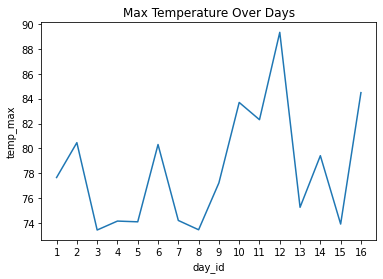

In [0]:
sn.lineplot(data = weather_16_pd, x = "day_id", y = "temp_max").set(title="Max Temperature Over Days")

### Relation Wind Speed and Max Temperature

Out[185]: [Text(0.5, 1.0, 'Relation Wind Speed and Max Temperature')]

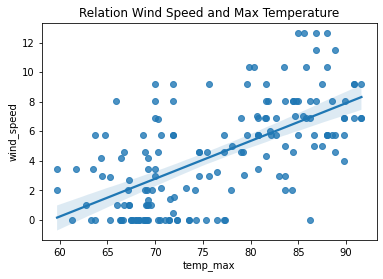

In [0]:
sn.regplot(data = weather_history_pd, x="temp_max", y="wind_speed").set(title="Relation Wind Speed and Max Temperature")

## Summary Tables
The first table finds the average temperature for each of the 16 days.
The second table shows how hours that specific weather condition happened.

In [0]:
summary1 = weather_16.select("dt", "temp_day", "temp_morn", "temp_night", "temp_eve")

In [0]:
display(summary1.withColumn("temp_avg", (summary1.temp_day + summary1.temp_morn + summary1.temp_night + summary1.temp_eve) / 4))

dt,temp_day,temp_morn,temp_night,temp_eve,temp_avg
2023-06-05 17:00:00,77.47,56.12,65.55,74.05,68.2975
2023-06-06 17:00:00,77.92,54.82,66.94,75.11,68.6975
2023-06-07 17:00:00,62.69,58.41,58.08,70.61,62.447500000000005
2023-06-08 17:00:00,73.27,51.64,60.44,66.47,62.955
2023-06-09 17:00:00,72.97,54.12,56.73,66.79,62.6525
2023-06-10 17:00:00,77.9,57.78,66.61,71.94,68.5575
2023-06-11 17:00:00,74.19,63.03,65.5,72.52,68.81
2023-06-12 17:00:00,71.62,60.71,59.04,66.88,64.5625
2023-06-13 17:00:00,76.62,58.24,62.06,71.56,67.12
2023-06-14 17:00:00,79.3,62.15,68.13,74.34,70.97999999999999


In [0]:
summary2 = weather_history.groupBy("main").count()
display(summary2.withColumnRenamed("count", "hours"))

main,hours
List(Thunderstorm),1
List(Clear),116
List(Mist),4
List(Clouds),47


Rest APIs are already structured, and the calls retrieve the data in the same structure. However, due to the user's requirement of receiving the data in a specific format, a lot of unnecessary traffic occurs. This can happen when the calls retrieve either too much or too little information. In the former case, irrelevant data is transferred, causing additional traffic. In the latter case, the user needs to make more calls to obtain all the required information. This scenario is usually true because the format also includes multiple endpoints, necessitating separate requests to different endpoints based on the user's needs.

GraphQL, on the other hand, is a query language. This allows the user to specify the query, and the server will retrieve only the requested information in the desired format. This grants more control to the user, and when implemented correctly, the query can efficiently retrieve the data compared to a Rest API.